# Proyecto Regresion lineal regularizada

IMPORTS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, SelectKBest
from pickle import dump

DATASET

In [3]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
total_data.to_csv("../data/raw/diabetes_data.csv", index=False)

total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


# EDA

In [4]:
total_data.shape

(3140, 108)

unificamos y filtramos columnas de porcentajes 

In [6]:
erace_columns = [c for c in total_data.columns if "%" in c or "percent" in c.lower() or "CI" in c or c[0].isdigit() or "201" in c or "alone" in c]

erace_columns.extend(["fips", "Total Population", "Two or more races pop", "Urban_rural_code", "COUNTY_NAME"])

erace_columns

['0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or higher 2014-18",
 'Percent of adults with less 

In [8]:
total_data.drop(erace_columns, axis= 1, inplace= True)

In [9]:
total_data.shape

(3140, 18)

In [10]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TOT_POP                   3140 non-null   int64  
 1   ICU Beds_x                3140 non-null   int64  
 2   Population Aged 60+       3140 non-null   int64  
 3   STATE_NAME                3140 non-null   object 
 4   STATE_FIPS                3140 non-null   int64  
 5   CNTY_FIPS                 3140 non-null   int64  
 6   anycondition_prevalence   3140 non-null   float64
 7   anycondition_number       3140 non-null   int64  
 8   Obesity_prevalence        3140 non-null   float64
 9   Obesity_number            3140 non-null   int64  
 10  Heart disease_prevalence  3140 non-null   float64
 11  Heart disease_number      3140 non-null   int64  
 12  COPD_prevalence           3140 non-null   float64
 13  COPD_number               3140 non-null   int64  
 14  diabetes

In [14]:
categorical_qty = 0
categoric_column = []
numeric_qty = 0
numeric_column = []

for column, dtype in total_data.dtypes.items():
    if dtype == "object" or dtype == "bool":
        categorical_qty += 1
        categoric_column.append(column)
    elif dtype == "int64" or dtype == "float64":
        numeric_qty += 1
        numeric_column.append(column) 

# Imprimir cantidad y nombres de columnas categóricas y numéricas

def categorical(): 
    print(f"there is {categorical_qty} categorical variables = {categoric_column}")

def numeric(): 
    print(f"there is {numeric_qty} categorical variables = {numeric_column}")

In [32]:
target = "Heart disease_number"

In [16]:
total_data.duplicated().sum()

0

In [17]:
total_data.head()

,TOT_POP,ICU Beds_x,Population Aged 60+,STATE_NAME,STATE_FIPS,CNTY_FIPS,anycondition_prevalence,anycondition_number,Obesity_prevalence,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number
0,55601,6,10523,Alabama,1,1,47.6,20181,35.8,15193,7.9,3345,8.6,3644,12.9,5462,3.1,1326
1,218022,51,53519,Alabama,1,3,40.2,68790,29.7,50761,7.8,13414,8.6,14692,12.0,20520,3.2,5479
2,24881,5,6150,Alabama,1,5,57.5,11325,40.7,8013,11.0,2159,12.1,2373,19.7,3870,4.5,887
3,22400,0,4773,Alabama,1,7,51.6,9190,38.7,6894,8.6,1533,10.0,1789,14.1,2511,3.3,595
4,57840,6,13600,Alabama,1,9,46.3,20584,34.0,15112,9.2,4101,10.5,4661,13.5,6017,3.4,1507


ANALISIS DE VARIABLES UNIVARIADAS

Categórica

In [21]:
categorical()

there is 1 categorical variables = ['STATE_NAME']


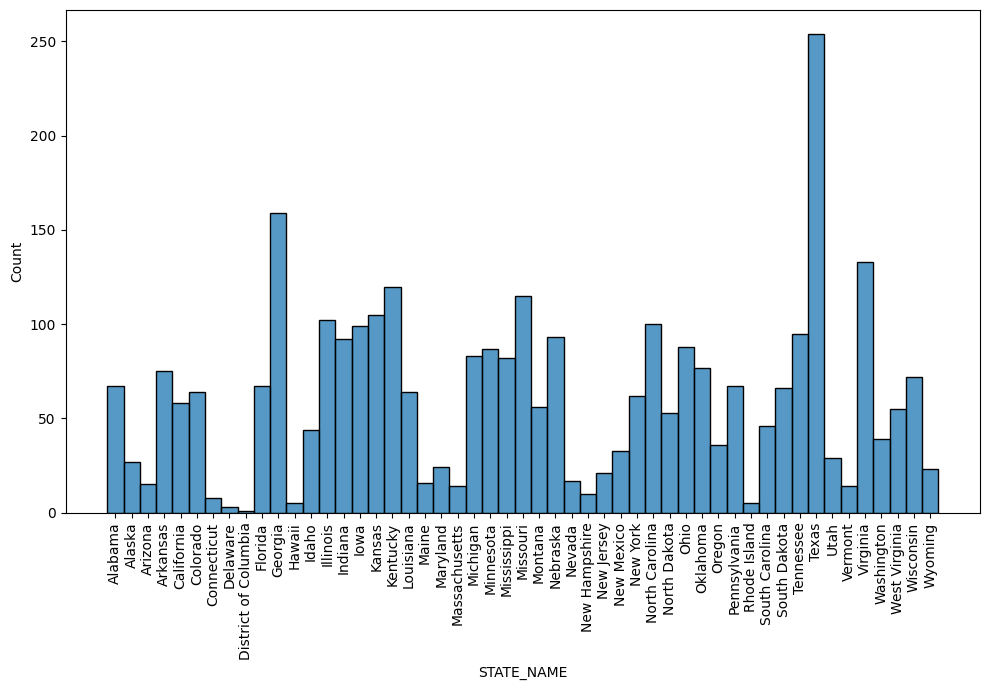

In [23]:
plt.figure(figsize= (10, 7))

# histograma multiple
sns.histplot(data = total_data, x = categoric_column[0])
plt.tick_params(axis='x', labelrotation=90)
plt.tight_layout()

plt.show()

VARIABLES NUMÉRICAS

In [24]:
numeric()

there is 17 categorical variables = ['TOT_POP', 'ICU Beds_x', 'Population Aged 60+', 'STATE_FIPS', 'CNTY_FIPS', 'anycondition_prevalence', 'anycondition_number', 'Obesity_prevalence', 'Obesity_number', 'Heart disease_prevalence', 'Heart disease_number', 'COPD_prevalence', 'COPD_number', 'diabetes_prevalence', 'diabetes_number', 'CKD_prevalence', 'CKD_number']


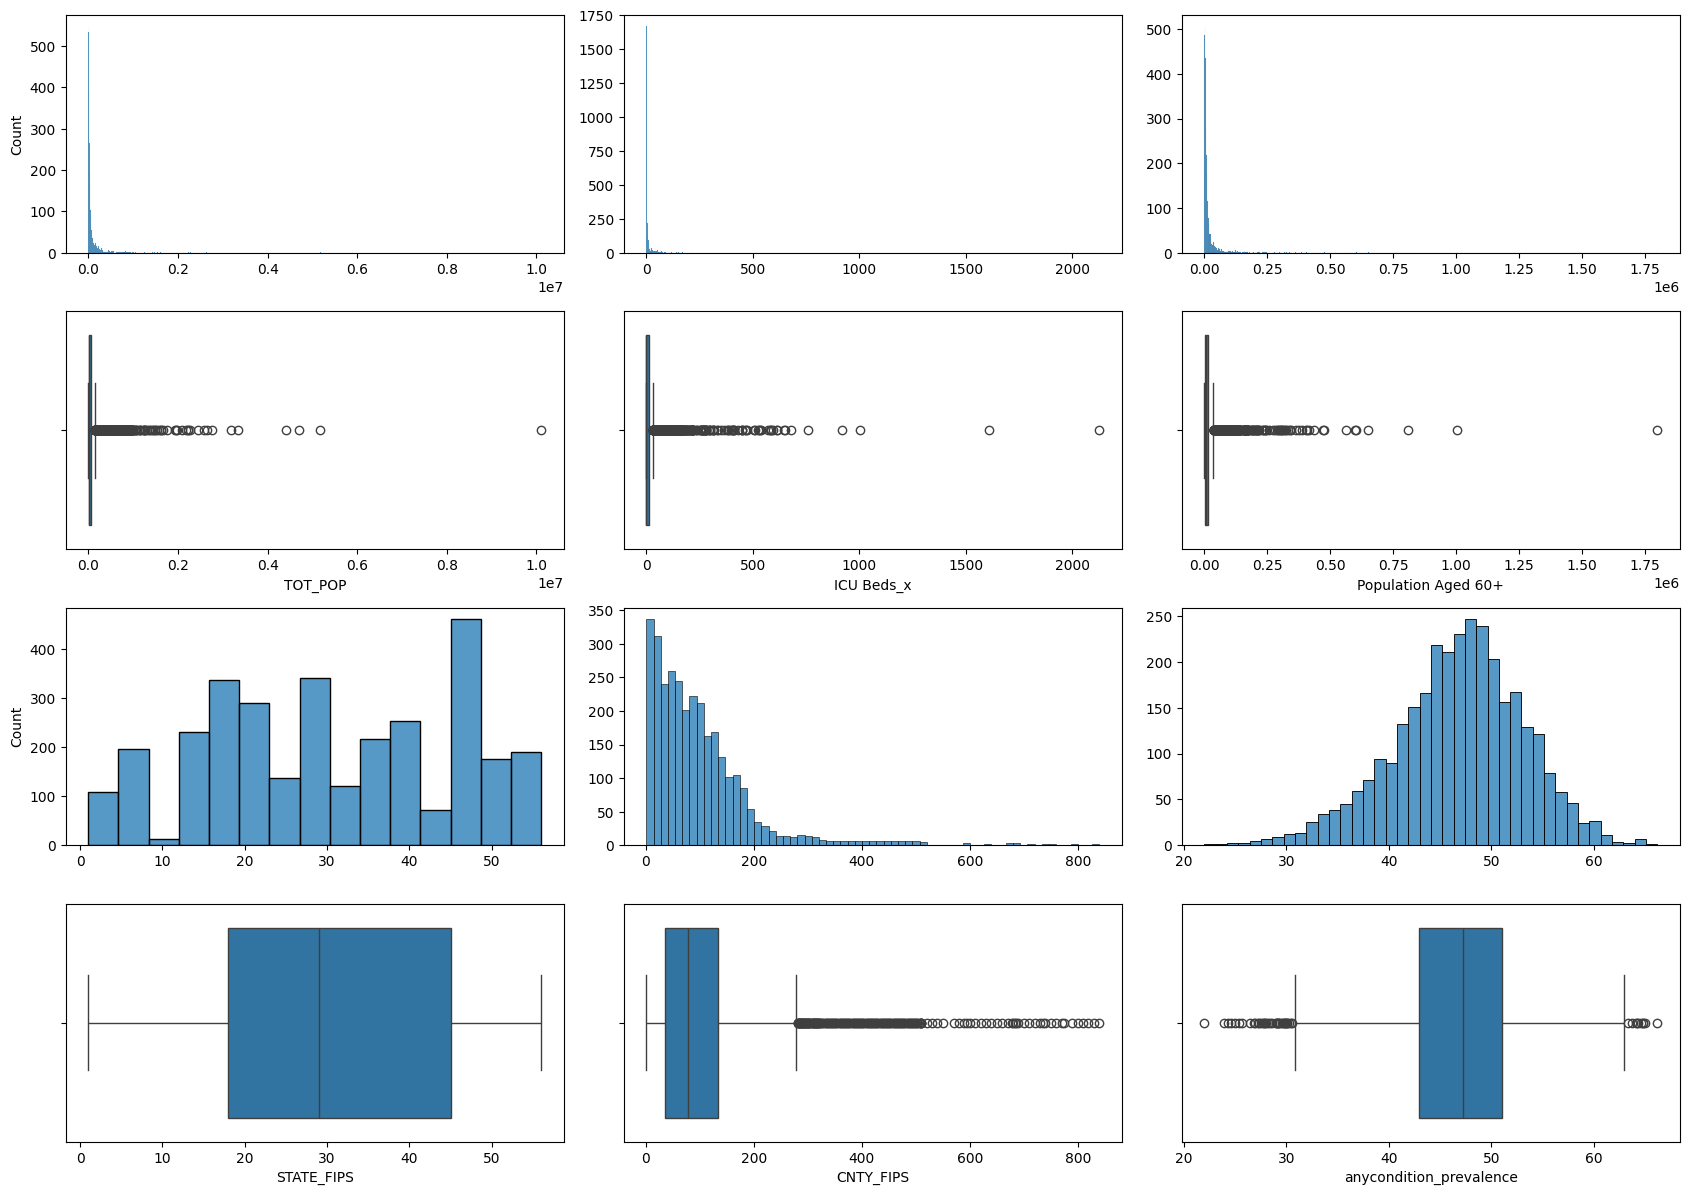

In [28]:
fig, axis = plt.subplots(4, 3, figsize= (17, 12))

sns.histplot(ax = axis[0, 0], data = total_data, x = numeric_column[0]).set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = numeric_column[0])
sns.histplot(ax = axis[0, 1], data = total_data, x = numeric_column[1]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = numeric_column[1])
sns.histplot(ax = axis[0, 2], data = total_data, x = numeric_column[2]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data, x = numeric_column[2])
sns.histplot(ax = axis[2, 0], data = total_data, x = numeric_column[3]).set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = numeric_column[3])
sns.histplot(ax = axis[2, 1], data = total_data, x = numeric_column[4]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = numeric_column[4])
sns.histplot(ax = axis[2, 2], data = total_data, x = numeric_column[5]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = total_data, x = numeric_column[5])

plt.tight_layout()
plt.show()

En estos gráficos, podemos observar lo siguiente:

TOT_POP (Población Total): Aunque la mediana y la moda pueden parecer cercanas, existen numerosos valores atípicos debido a condados con valores de población notablemente altos.

ICU beds_x (Camas de Cuidados Intensivos): A pesar de una potencial proximidad entre la mediana y la moda, se observan varios valores atípicos debido a condados con significativamente más camas_x de cuidados intensivos que la mayoría.

Población de 60 años o más: A pesar de la aparente proximidad entre la mediana y la moda, existen varios valores atípicos, con al menos un condado que tiene una población superior a 17,500,000 personas de 60 años o más.

STATE_FIPS (Código FIPS del Estado): La moda se encuentra a la derecha de la mediana, ubicándose entre el tercer cuartil y la "whisker" superior.

CNTY_FIPS (Código FIPS del Condado): Muestra una distribución sesgada a la izquierda, con la moda posicionada a la izquierda de la mediana.

anycondition_prevalence (Prevalencia de Condiciones de Salud): Demuestra una distribución normal asimétrica, donde la mediana y la moda coinciden.

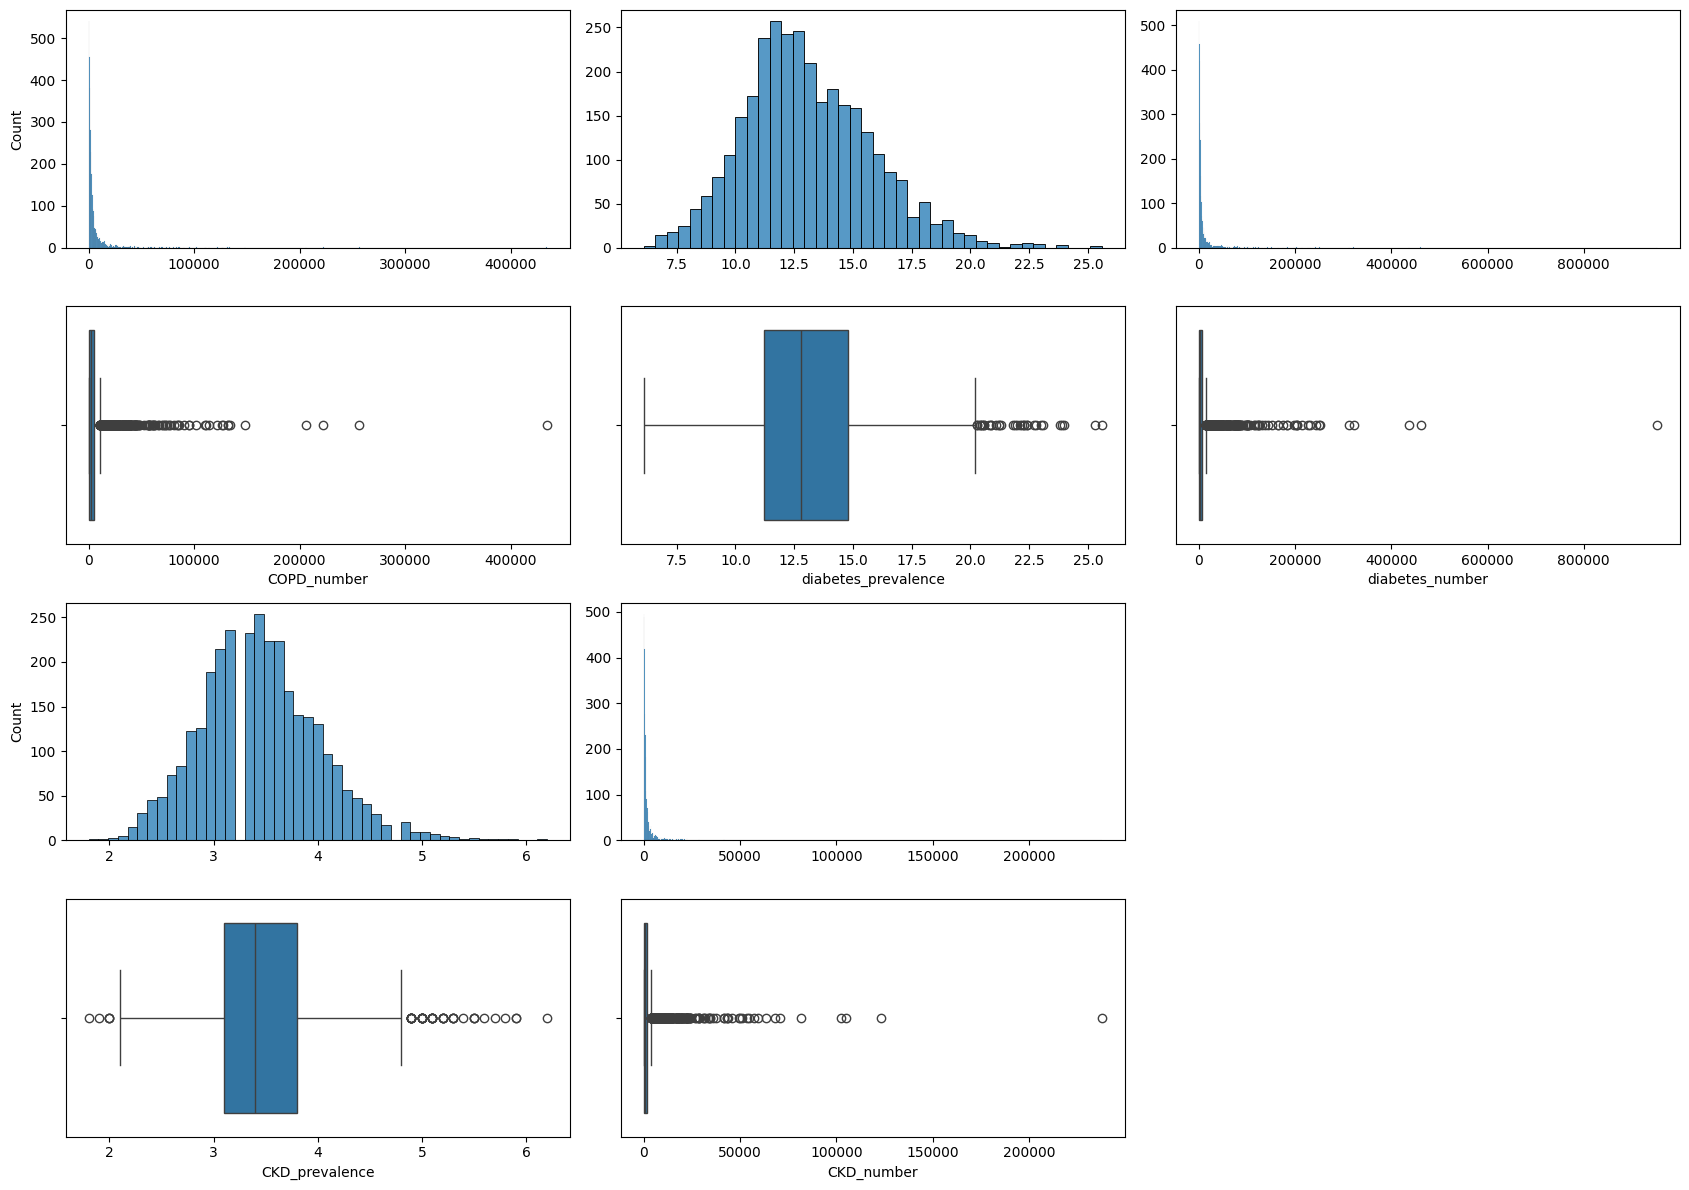

In [29]:
fig, axis = plt.subplots(4, 3, figsize= (17, 12))

sns.histplot(ax = axis[0, 0], data = total_data, x = numeric_column[12]).set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = numeric_column[12])
sns.histplot(ax = axis[0, 1], data = total_data, x = numeric_column[13]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = numeric_column[13])
sns.histplot(ax = axis[0, 2], data = total_data, x = numeric_column[14]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data, x = numeric_column[14])
sns.histplot(ax = axis[2, 0], data = total_data, x = numeric_column[15]).set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = numeric_column[15])
sns.histplot(ax = axis[2, 1], data = total_data, x = numeric_column[16]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = numeric_column[16])

plt.delaxes(ax = axis[2, 2])
plt.delaxes(ax = axis[3, 2])

plt.tight_layout()

COPD_number (Número de personas con Enfermedad Pulmonar Obstructiva Crónica): Aunque la mediana y la moda parecen cercanas, hay varios valores atípicos presentes debido a condados que muestran niveles notablemente altos de COPD.

Diabetes_prevalence (Prevalencia de Diabetes): Muestra una distribución normal asimétrica, donde la moda se sitúa a la izquierda de la mediana.

Diabetes_number (Número de personas con Diabetes): Aunque la mediana y la moda parecen cercanas, hay varios valores atípicos presentes debido a condados que muestran niveles notablemente altos de diabetes.

CKD_prevalence (Prevalencia de Enfermedad Renal Crónica): Demuestra una distribución normal asimétrica, donde la mediana y la moda coinciden.

CKD_number (Número de personas con Enfermedad Renal Crónica): Aunque la mediana y la moda parecen cercanas, hay varios valores atípicos presentes debido a condados que muestran niveles notablemente altos de CKD.

ANALISIS DE MULTIVARIANTES VARIABLES

NUMÉRICAS - NUMÉRICAS 

In [30]:
numeric_column

['TOT_POP',
 'ICU Beds_x',
 'Population Aged 60+',
 'STATE_FIPS',
 'CNTY_FIPS',
 'anycondition_prevalence',
 'anycondition_number',
 'Obesity_prevalence',
 'Obesity_number',
 'Heart disease_prevalence',
 'Heart disease_number',
 'COPD_prevalence',
 'COPD_number',
 'diabetes_prevalence',
 'diabetes_number',
 'CKD_prevalence',
 'CKD_number']

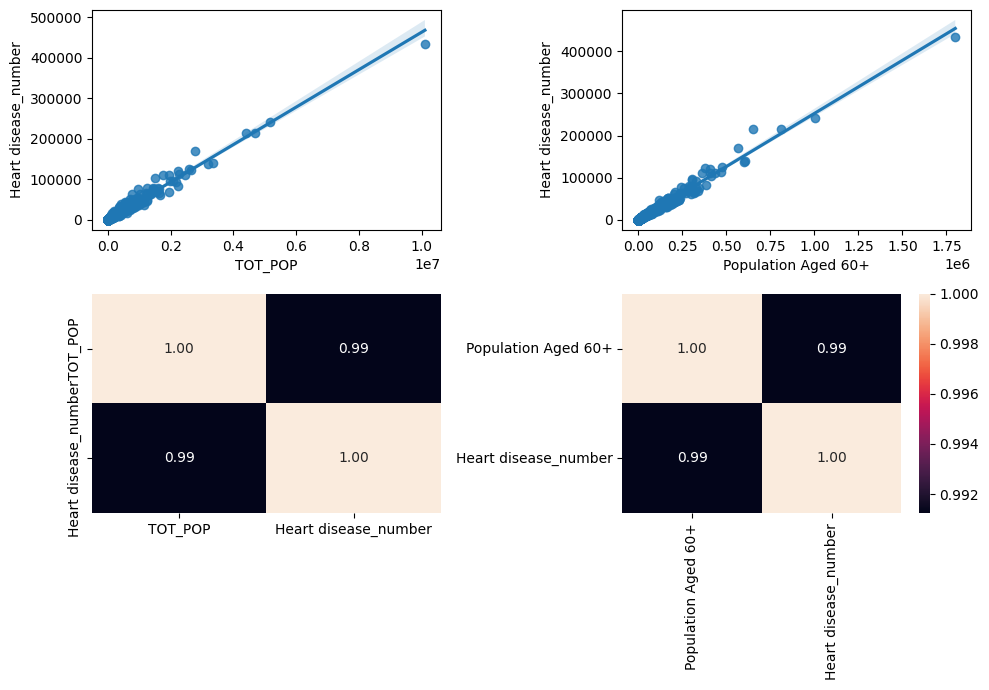

In [33]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = total_data, x = numeric_column[0], y = target)
sns.heatmap(total_data[[numeric_column[0], target]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = numeric_column[2], y = target)
sns.heatmap(total_data[[numeric_column[2], target]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()

plt.show()

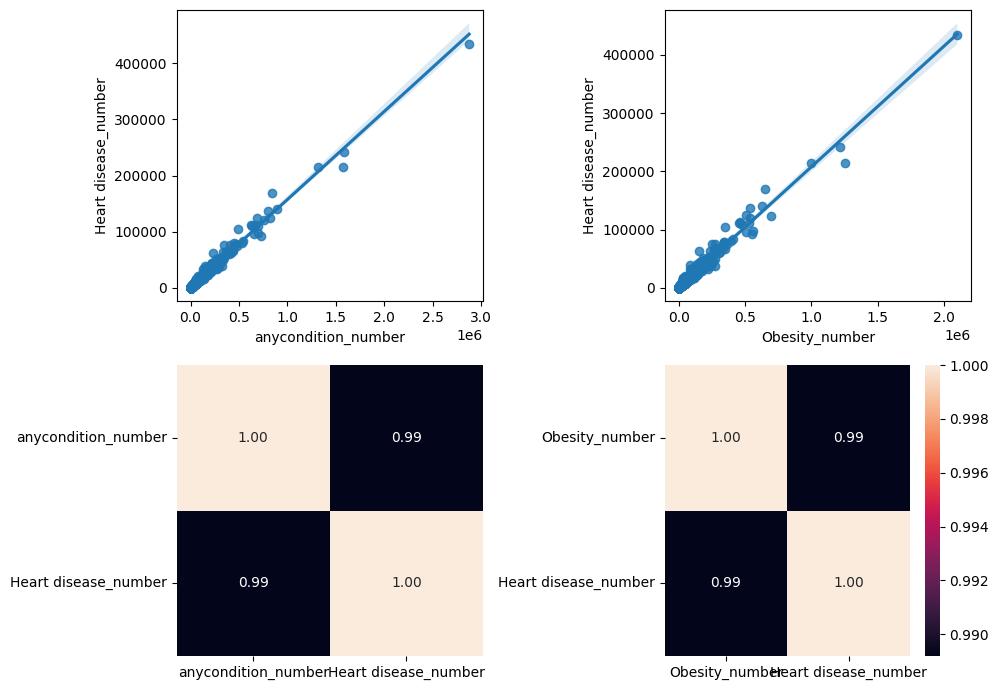

In [34]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = total_data, x = numeric_column[6], y = target)
sns.heatmap(total_data[[numeric_column[6], target]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = numeric_column[8], y = target)
sns.heatmap(total_data[[numeric_column[8], target]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()
plt.show()

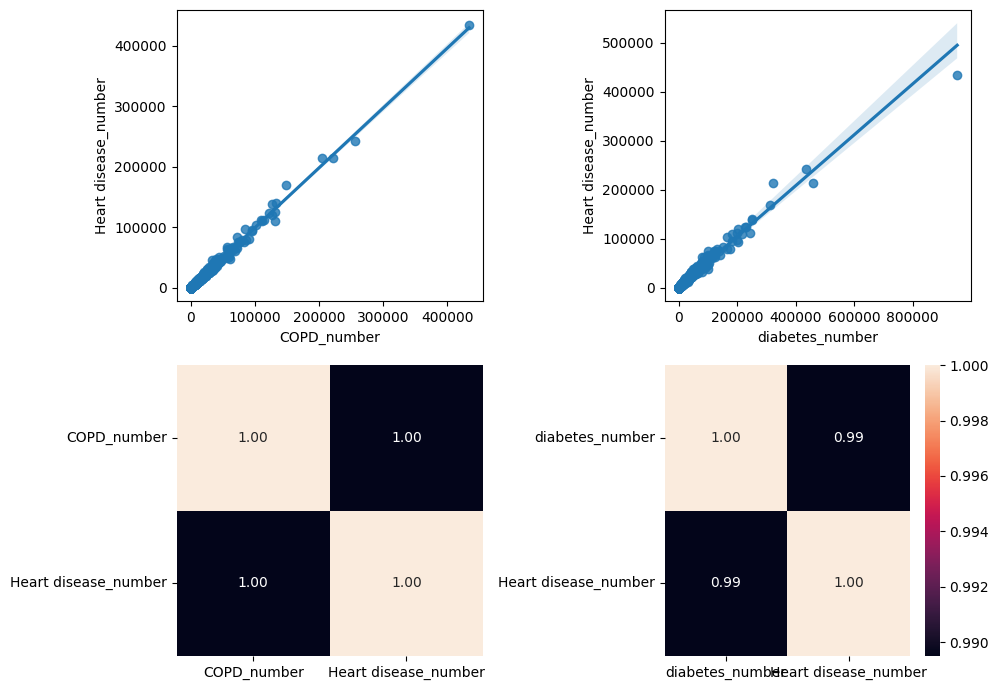

In [35]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = total_data, x = numeric_column[12], y = target)
sns.heatmap(total_data[[numeric_column[12], target]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = numeric_column[14], y = target)
sns.heatmap(total_data[[numeric_column[14], target]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()
plt.show()

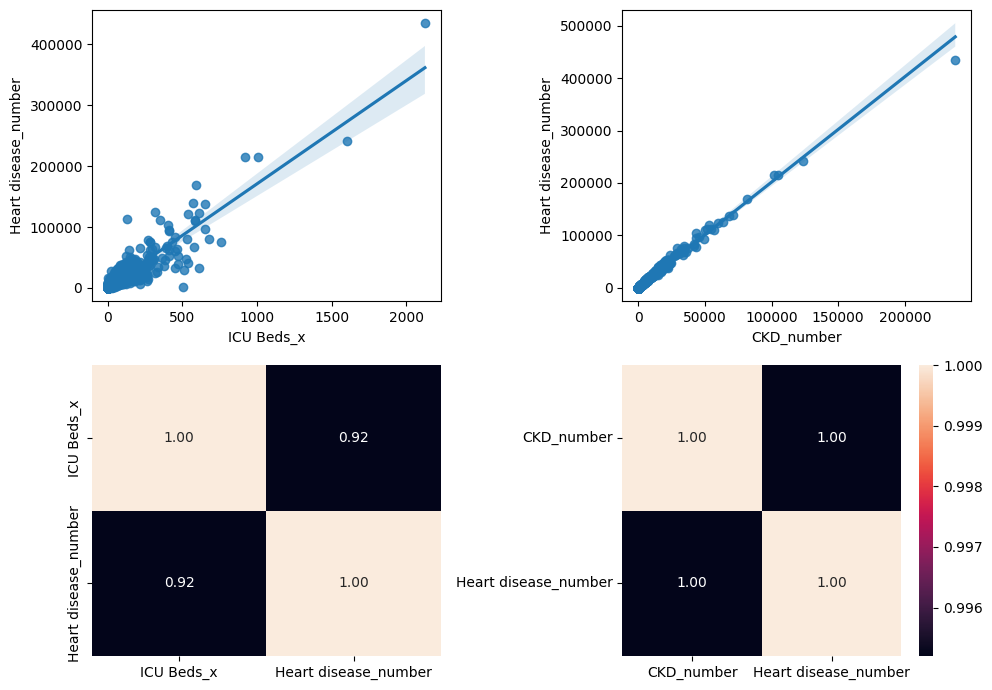

In [36]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = total_data, x = numeric_column[1], y = target)
sns.heatmap(total_data[[numeric_column[1], target]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = numeric_column[16], y = target)
sns.heatmap(total_data[[numeric_column[16], target]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()

plt.show()

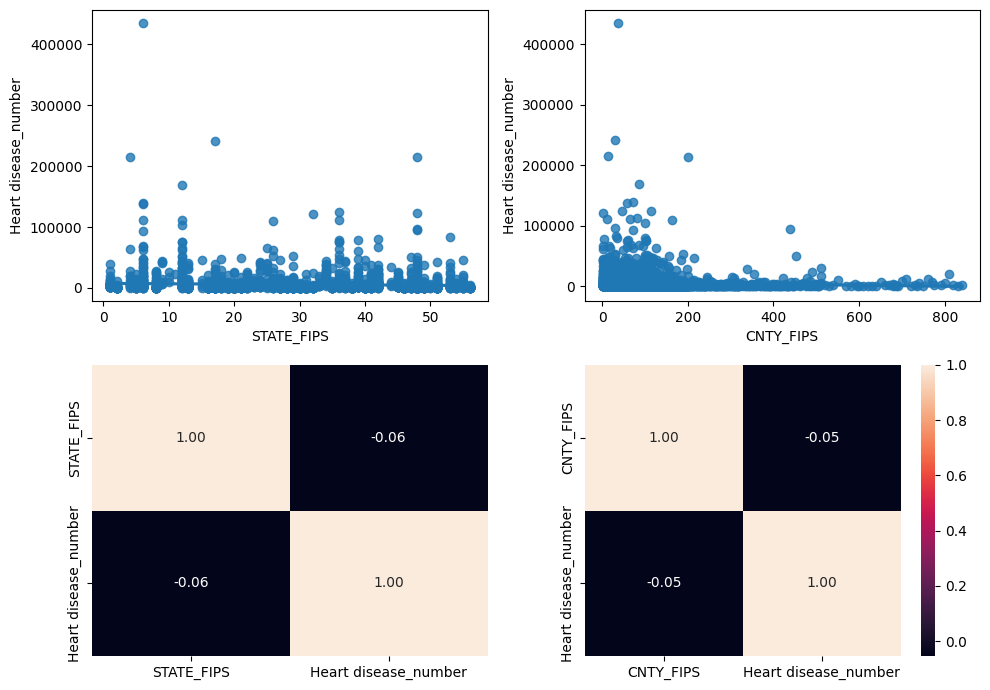

In [37]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = total_data, x = numeric_column[3], y = target)
sns.heatmap(total_data[[numeric_column[3], target]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = numeric_column[4], y = target)
sns.heatmap(total_data[[numeric_column[4], target]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()

plt.show()

COMBINACIONES DE CLASE CON VARIOS PREDICTORES

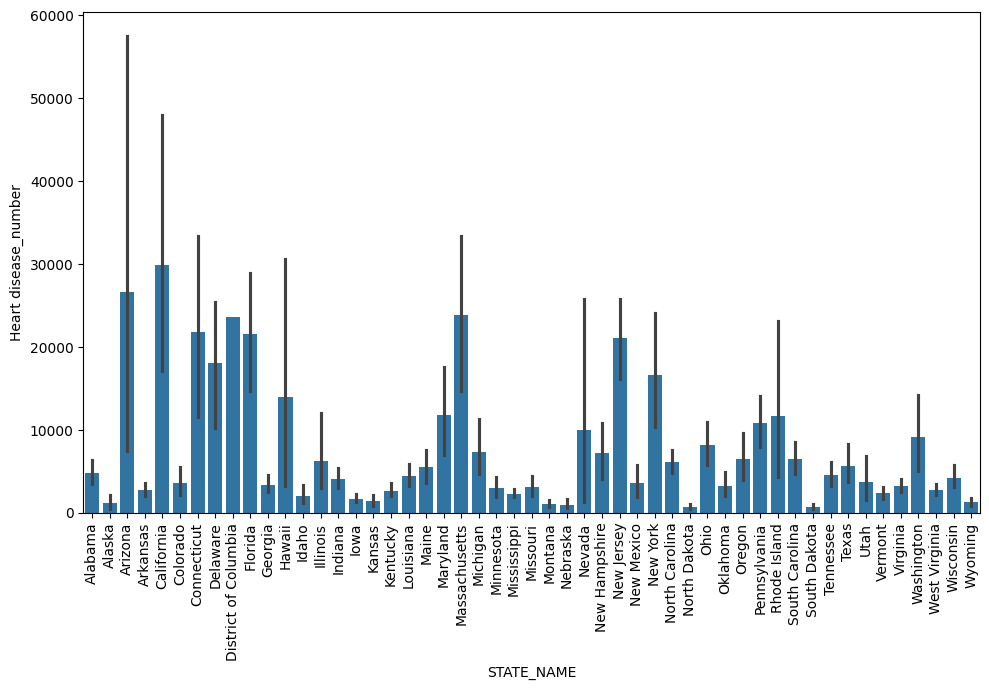

In [38]:
plt.figure(figsize=(10, 7))

sns.barplot(data = total_data, x = "STATE_NAME", y = target)

plt.tick_params(axis = "x", labelrotation = 90)

plt.tight_layout()

plt.show()


Una observación clave en el gráfico: los estados con el mayor número de casos de enfermedad cardíaca son California, Arizona y Massachusetts. Esta información proporciona una perspectiva inicial sobre la distribución geográfica de la carga de enfermedad cardíaca, resaltando la prevalencia de esta condición en esos estados específicos

ANALISIS DE CORRELACION

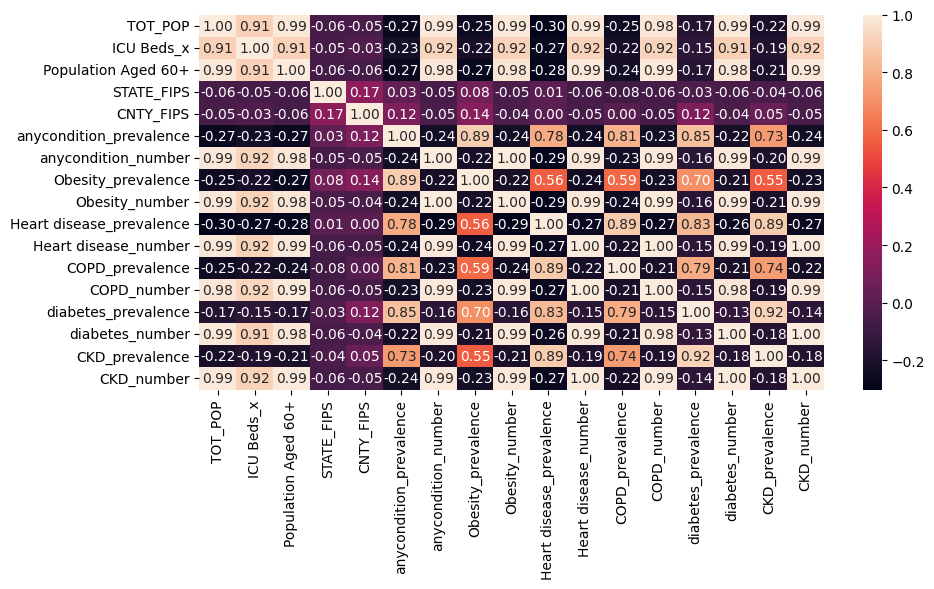

In [39]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[numeric_column].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Destacan las correlaciones observadas en un mapa de calor (heatmap) relacionadas con el objetivo (Heart disease_number). Se señala que hay correlaciones directas con variables como TOT_POP (Población Total), ICU beds_x (Camas de Cuidados Intensivos), población de 60 años o más, y diferentes tipos de condition_number (CKD, Diabetes, COPD, Obesidad y anycondition), destacando que las correlaciones más fuertes se encuentran con CKD y COPD.

En resumen, el mapa de calor revela patrones de correlación entre la variable objetivo (Heart disease_number) y otras variables, destacando aquellas con fuertes conexiones como CKD y COPD

FEATURE ENGINEERING

ANALISIS DE OUTLIER

In [41]:
total_data[numeric_column].describe()


,TOT_POP,ICU Beds_x,Population Aged 60+,STATE_FIPS,CNTY_FIPS,anycondition_prevalence,anycondition_number,Obesity_prevalence,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number
count,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,1.041894e+05,23.817516,2.132298e+04,30.298089,103.551592,46.793917,3.338540e+04,35.019299,2.527613e+04,8.607803,5597.593312,9.095223,5827.242357,13.073503,9326.577707,3.446242,2466.234076
std,3.335834e+05,84.602028,6.140588e+04,15.132325,107.689584,6.379448,9.888669e+04,4.517088,7.446684e+04,1.758587,15615.285499,2.344965,15720.551934,2.724351,29754.601185,0.568059,7730.422067
min,8.800000e+01,0.000000,2.700000e+01,1.000000,1.000000,22.000000,4.100000e+01,15.200000,2.500000e+01,3.500000,7.000000,3.500000,7.000000,6.100000,11.000000,1.800000,3.000000
25%,1.096325e+04,0.000000,2.814750e+03,18.000000,35.000000,42.900000,4.215000e+03,32.400000,3.075000e+03,7.400000,798.500000,7.300000,815.000000,11.200000,1187.750000,3.100000,314.750000
50%,2.580050e+04,0.000000,6.310000e+03,29.000000,79.000000,47.200000,9.753000e+03,35.400000,7.182500e+03,8.600000,1814.500000,8.900000,1963.500000,12.800000,2743.000000,3.400000,718.000000
75%,6.791300e+04,12.000000,1.610625e+04,45.000000,133.000000,51.000000,2.500125e+04,37.900000,1.854250e+04,9.800000,4376.000000,10.600000,4727.000000,14.800000,6679.250000,3.800000,1776.250000
max,1.010552e+07,2126.000000,1.800341e+06,56.000000,840.000000,66.200000,2.877316e+06,49.900000,2.097906e+06,15.100000,434790.000000,19.900000,434075.000000,25.600000,952335.000000,6.200000,237766.000000


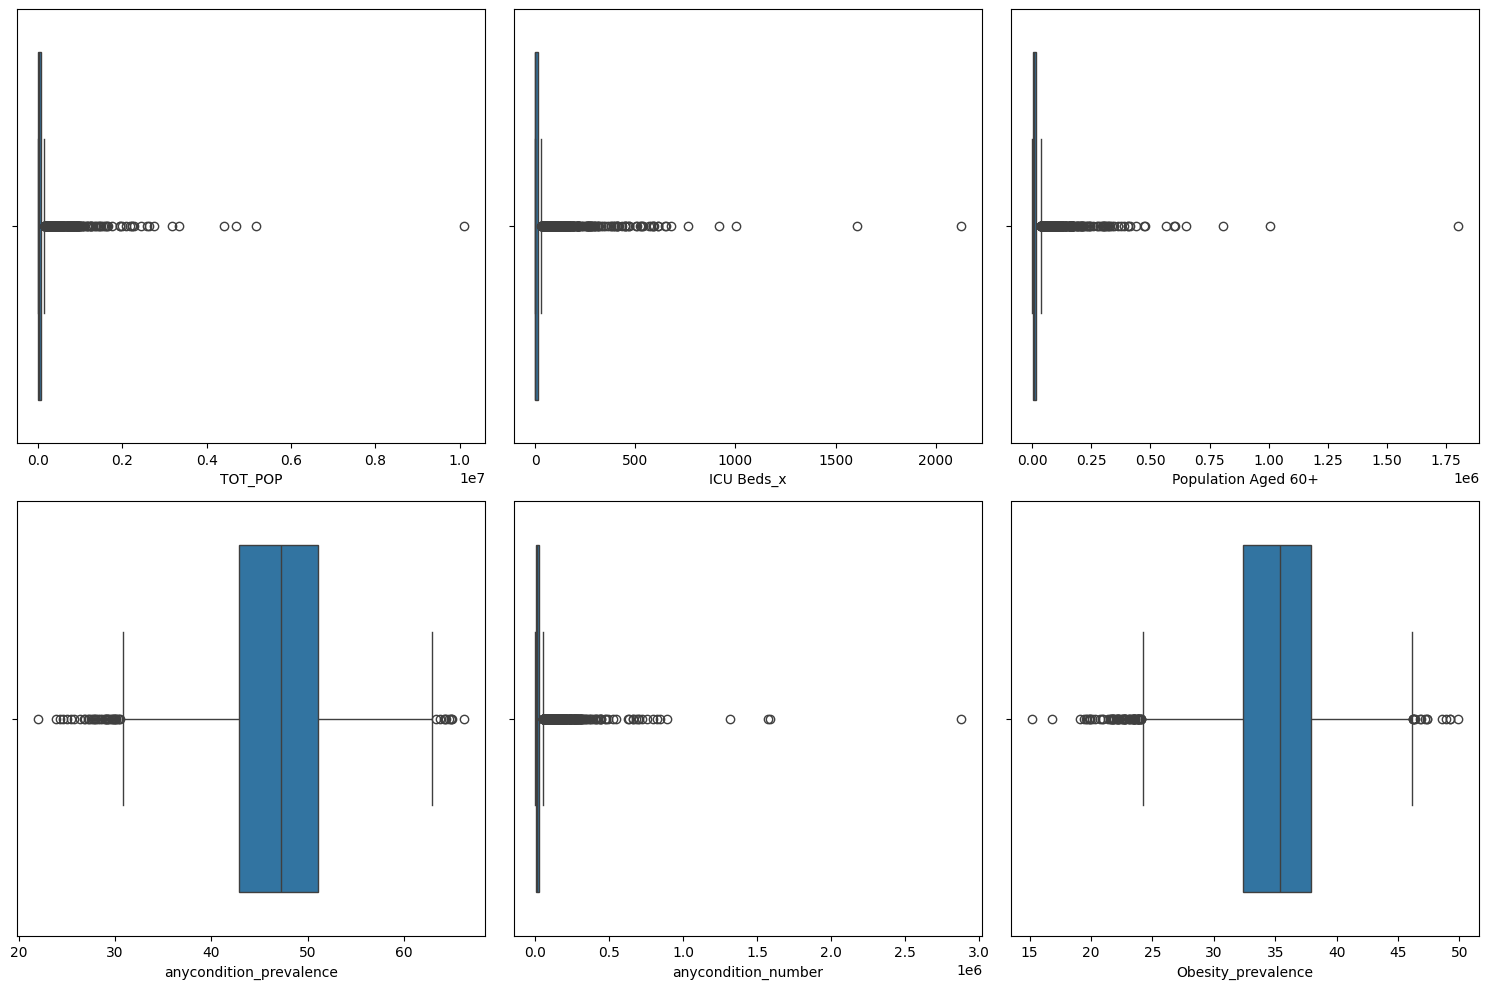

In [44]:
fig, axis = plt.subplots(2, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0,0], data = total_data, x = numeric_column[0])
sns.boxplot(ax = axis[0,1], data = total_data, x = numeric_column[1])
sns.boxplot(ax = axis[0,2], data = total_data, x = numeric_column[2])
sns.boxplot(ax = axis[1,0], data = total_data, x = numeric_column[5])
sns.boxplot(ax = axis[1,1], data = total_data, x = numeric_column[6])
sns.boxplot(ax = axis[1,2], data = total_data, x = numeric_column[7])

plt.tight_layout()

plt.show()

FEATURE SCALING

Dividimos el dataset en train y test

In [45]:
X = total_data[numeric_column].drop(target, axis = 1)
y = total_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)

X_train.head()

,TOT_POP,ICU Beds_x,Population Aged 60+,STATE_FIPS,CNTY_FIPS,anycondition_prevalence,anycondition_number,Obesity_prevalence,Obesity_number,Heart disease_prevalence,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number
57,88690,6,18943,1,115,53.1,36408,38.0,26054,8.3,9.8,6712,13.0,8914,3.2,2181
1814,39006,8,9932,35,39,47.0,14031,33.8,10101,8.5,7.3,2172,17.2,5134,4.4,1304
2855,15631,0,4703,51,77,53.5,6969,38.7,5038,10.7,11.7,1519,14.6,1902,4.0,520
2276,210793,51,54892,42,69,42.8,71785,30.8,51605,8.0,8.4,14087,11.5,19253,3.2,5367
2619,3922,0,1077,48,197,50.3,1552,37.6,1160,10.3,10.0,309,15.4,474,3.9,122


In [47]:
X_train.to_csv("/workspaces/proyectregresionlineal/data/interim/us_train_x.csv", index=False)
y_train.to_csv("/workspaces/proyectregresionlineal/data/interim/us_train_y.csv", index=False)

X_test.to_csv("/workspaces/proyectregresionlineal/data/interim/us_test_x.csv", index=False)
y_test.to_csv("/workspaces/proyectregresionlineal/data/interim/us_test_y.csv", index=False)

In [48]:
num_variables = numeric_column
num_variables.remove(target)

In [49]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

scal_features_train = scaler.transform(X_train)
scal_features_test = scaler.transform(X_test)

X_train_scal = pd.DataFrame(scal_features_train, index = X_train.index, columns = num_variables)
X_test_scal = pd.DataFrame(scal_features_test, index = X_test.index, columns = num_variables)

dump(scaler, open("/workspaces/proyectregresionlineal/models/scaler.pk", "wb"))

X_train_scal.head()

,TOT_POP,ICU Beds_x,Population Aged 60+,STATE_FIPS,CNTY_FIPS,anycondition_prevalence,anycondition_number,Obesity_prevalence,Obesity_number,Heart disease_prevalence,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number
57,0.016285,-0.245872,0.025800,-1.934417,0.136190,0.939915,0.147761,0.642242,0.110275,-0.192346,0.258446,0.175363,-0.025079,0.076451,-0.415694,0.033039
1814,-0.239594,-0.213158,-0.209903,0.301921,-0.611116,0.007561,-0.235681,-0.290805,-0.248213,-0.082100,-0.762763,-0.279762,1.449273,-0.147417,1.608865,-0.161848
2855,-0.359979,-0.344012,-0.346680,1.354315,-0.237463,1.001053,-0.356693,0.797750,-0.361986,1.130609,1.034565,-0.345224,0.536579,-0.338830,0.934012,-0.336068
2276,0.645133,0.490181,0.966129,0.762343,-0.316127,-0.634388,0.753965,-0.957267,0.684445,-0.357715,-0.313431,0.914692,-0.551634,0.688771,-0.415694,0.741029
2619,-0.420282,-0.344012,-0.441526,1.156991,0.942493,0.511949,-0.449516,0.553380,-0.449131,0.910117,0.340143,-0.466524,0.817408,-0.423402,0.765299,-0.424511


In [50]:
X_train_scal.to_csv("/workspaces/proyectregresionlineal/data/interim/us_train_x_scal.csv", index=False)
X_test_scal.to_csv("/workspaces/proyectregresionlineal/data/interim/us_test_x_scal.csv", index=False)

Feature selection

In [51]:
selection_model = SelectKBest(f_regression, k= (int(len(X_train.columns)*0.70)))
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel["y"] = list(y_train)
X_test_sel["y"] = list(y_test)

dump(selection_model, open("/workspaces/proyectregresionlineal/models/selection_model_70.pk", "wb"))

X_train_sel.head()

,TOT_POP,ICU Beds_x,Population Aged 60+,anycondition_prevalence,anycondition_number,Obesity_prevalence,Obesity_number,Heart disease_prevalence,COPD_number,diabetes_number,CKD_number,y
0,88690.0,6.0,18943.0,53.1,36408.0,38.0,26054.0,8.3,6712.0,8914.0,2181.0,5711
1,39006.0,8.0,9932.0,47.0,14031.0,33.8,10101.0,8.5,2172.0,5134.0,1304.0,2546
2,15631.0,0.0,4703.0,53.5,6969.0,38.7,5038.0,10.7,1519.0,1902.0,520.0,1398
3,210793.0,51.0,54892.0,42.8,71785.0,30.8,51605.0,8.0,14087.0,19253.0,5367.0,13334
4,3922.0,0.0,1077.0,50.3,1552.0,37.6,1160.0,10.3,309.0,474.0,122.0,319


In [53]:
X_train_sel.to_csv("/workspaces/proyectregresionlineal/data/processed/us_train_sel_70.csv", index=False)
X_test_sel.to_csv("/workspaces/proyectregresionlineal/data/processed/us_test_sel_70.csv", index=False)

In [55]:
selection_model = SelectKBest(f_regression, k= (int(len(X_train.columns)*0.80)))
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel["y"] = list(y_train)
X_test_sel["y"] = list(y_test)

dump(selection_model, open("/workspaces/proyectregresionlineal/models/selection_model_80.pk", "wb"))

X_train_sel.head()

,TOT_POP,ICU Beds_x,Population Aged 60+,anycondition_prevalence,anycondition_number,Obesity_prevalence,Obesity_number,Heart disease_prevalence,COPD_prevalence,COPD_number,diabetes_number,CKD_number,y
0,88690.0,6.0,18943.0,53.1,36408.0,38.0,26054.0,8.3,9.8,6712.0,8914.0,2181.0,5711
1,39006.0,8.0,9932.0,47.0,14031.0,33.8,10101.0,8.5,7.3,2172.0,5134.0,1304.0,2546
2,15631.0,0.0,4703.0,53.5,6969.0,38.7,5038.0,10.7,11.7,1519.0,1902.0,520.0,1398
3,210793.0,51.0,54892.0,42.8,71785.0,30.8,51605.0,8.0,8.4,14087.0,19253.0,5367.0,13334
4,3922.0,0.0,1077.0,50.3,1552.0,37.6,1160.0,10.3,10.0,309.0,474.0,122.0,319


In [57]:
X_train_sel.to_csv("/workspaces/proyectregresionlineal/data/processed/us_train_sel_80.csv", index=False)
X_test_sel.to_csv("/workspaces/proyectregresionlineal/data/processed/us_test_sel_80.csv", index=False)